In [2]:
import numpy as np
import pandas as pd
# Set up matplotlib and use a nicer set of plot parameters
import matplotlib
#matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
matplotlib.rc('text', usetex=True)

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\kreativekeith422\\Desktop\\thesis\\GALPROP'

In [5]:
from astropy.utils.data import download_file


In [6]:
from astropy.io import fits


In [7]:
master_path='D:\\GALPROP\\runs_L_D\\'
L_val=8
D_val=12
extension1='L_'+str(L_val)+'_D_'+str(D_val)
extension2='\\nuclei_full_56_'+extension1
image_file2= master_path+extension1+extension2

#image_file2= 'D:\\GALPROP\\runs_L_D\\L_10_D_12\\nuclei_full_56_L_10_D_12'
#image_file3= "nuclei_full_56_ex3"
#image_file4= "nuclei_full_56_ex4"
#image_file5= "nuclei_full_56_ex5"

In [8]:
hdu_list2 = fits.open(image_file2)
hdu_list2.info()
#hdu_list3 = fits.open(image_file3)
#hdu_list3.info()
#hdu_list4 = fits.open(image_file4)
#hdu_list4.info()
#hdu_list5 = fits.open(image_file5)
#hdu_list5.info()

Filename: D:\GALPROP\runs_L_D\L_8_D_12\nuclei_full_56_L_8_D_12
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     491   (32, 29, 41, 24, 94)   float32   


In [9]:
hdr=hdu_list2[0].header
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    5 / number of data axes                            
NAXIS1  =                   32 / length of data axis 1                          
NAXIS2  =                   29 / length of data axis 2                          
NAXIS3  =                   41 / length of data axis 3                          
NAXIS4  =                   24 / length of data axis 4                          
NAXIS5  =                   94 / length of data axis 5                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CRVAL1  =                 -14. / Start of axis 1                                
CRVAL2  =                 -1

In [10]:
len(list(hdr.keys()))

491

In [11]:
image_data2 = hdu_list2[0].data

In [12]:
print(type(image_data2))
print(image_data2.shape)

<class 'numpy.ndarray'>
(94, 24, 41, 29, 32)


In [13]:
hdu_list2.close()


In [14]:
image_data2 = fits.getdata(image_file2)
print(type(image_data2))
print(image_data2.shape)
# should then be [element,energy, z, y, x]

<class 'numpy.ndarray'>
(94, 24, 41, 29, 32)


In [15]:
len(image_data2[:,0,0,0,0]) #access all elements at the zeroth energy scale, zmin, ymin, and xmin [element,energy,z, y,x]

94

In [16]:
#log10(E/MeV) = CRVAL3 + k * CDELT3 need to add in 100 MeV to this energy passed here since I am dumb
#flux (MeV/nucleon)2 cm−2sr−1s−1(MeV/nucleon)−1
# flux becomes MeV/nucleon /cm**2 /sr /s 
def undo_log_energy(energy):
    i=0
    while i<len(energy):
        energy[i]=10**(energy[i]+2)
        i+=1

In [17]:
energy=np.arange(0,7,0.304347391792257)
undo_log_energy(energy)

In [18]:
#these are at the position of earth we expect.
x_loc=24
y_loc=22
z_loc=40 #40th for the highest halo size of 4, 30th for halo size of 3

be_10_be_9_2=np.divide(image_data2[16,:,20,y_loc,x_loc],image_data2[15,:,20,y_loc,x_loc])
#be_10_be_9_3=np.divide(image_data3[16,:,30,y_loc,x_loc],image_data3[15,:,30,y_loc,x_loc])
#be_10_be_9_4=np.divide(image_data4[16,:,40,y_loc,x_loc],image_data4[15,:,40,y_loc,x_loc])
#be_10_be_9_5=np.divide(image_data5[16,:,50,y_loc,x_loc],image_data5[15,:,50,y_loc,x_loc])


In [19]:
#make helium 3-4 ratio at earth
he_3_4_2=np.divide(image_data2[10,:,20,y_loc,x_loc],image_data2[11,:,20,y_loc,x_loc])
#he_3_4_3=np.divide(image_data3[10,:,30,y_loc,x_loc],image_data3[11,:,30,y_loc,x_loc])
#he_3_4_4=np.divide(image_data4[10,:,40,y_loc,x_loc],image_data4[11,:,40,y_loc,x_loc])
#he_3_4_5=np.divide(image_data5[10,:,50,y_loc,x_loc],image_data5[11,:,50,y_loc,x_loc])

In [20]:
#HOW DO LISTS WORK
list1=['my', 'name','is','keith']
list2=['my', 'name','is','emmelie']
list3=[]
list3.append(list1)
print(list3)
list3.append(list2)
print(list3)
print(list3[0][-1])
print(list3[1][-1])
list3=[]
print(list3)

[['my', 'name', 'is', 'keith']]
[['my', 'name', 'is', 'keith'], ['my', 'name', 'is', 'emmelie']]
keith
emmelie
[]


In [21]:
Be_10_Be_9=[]
He_3_He_4=[]
L_val=1
D_val=12
while L_val<11:
    extension1='L_'+str(L_val)+'_D_'+str(D_val)
    extension2='\\nuclei_full_56_'+extension1
    image_file= master_path+extension1+extension2
    image_data = fits.getdata(image_file)
    Be_10_Be_9.append(np.divide(image_data[Be_10_loc,:,z_loc,y_loc,x_loc],image_data[Be_9_loc,:,z_loc,y_loc,x_loc]))
    He_3_He_4.append(np.divide(image_data[He_3_loc,:,z_loc,y_loc,x_loc],image_data[He_4_loc,:,z_loc,y_loc,x_loc]))
    L_val+=1
fnt=20
x1=10**2
x2=10**5
plt.figure(figsize=(12,12))
L_val=1
while L_val<11:
    plt.plot(energy,Be_10_Be_9[L_val-1],'-o',label="L="+str(L_val)+", D="+str(D_val))
    L_val+=1
#plt.plot(energy,be_10_be_9_3,'-o',label="L=3")
#plt.plot(energy,be_10_be_9_4,'-o',label="L=4")
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio_multiple_halo_sizes_d_12.png")
plt.show()

NameError: name 'Be_10_loc' is not defined

In [22]:
#image_data2 = fits.getdata(image_file2)
#L_val=8
#these are at the position of earth we expect.
x_loc=24
y_loc=22
z_loc=20 #20th element for all halo sizes
Be_10_loc=16
Be_9_loc=15
He_4_loc=11
He_3_loc=10
Be_10_Be_9_full=[]
He_3_He_4_full=[]
B_C_full=[]
carbon12_loc=19
carbon13_loc=20
boron_11=18
boron_10=17

D_val=3
while D_val<13:
    Be_10_Be_9=[]
    He_3_He_4=[]
    B_C=[]
    L_val=1
    while L_val<11:
        extension1='L_'+str(L_val)+'_D_'+str(D_val)
        extension2='\\nuclei_full_56_'+extension1
        image_file= master_path+extension1+extension2
        image_data = fits.getdata(image_file)
        Be_10_Be_9.append(np.divide(image_data[Be_10_loc,:,z_loc,y_loc,x_loc],image_data[Be_9_loc,:,z_loc,y_loc,x_loc]))
        He_3_He_4.append(np.divide(image_data[He_3_loc,:,z_loc,y_loc,x_loc],image_data[He_4_loc,:,z_loc,y_loc,x_loc]))
        L_val+=1
    Be_10_Be_9_full.append(Be_10_Be_9)
    He_3_He_4_full.append(He_3_He_4)
    D_val+=1
        

In [23]:
Be_10_Be_9_full[0][0] # this would be the lowest L and the lowest D
Be_10_Be_9_full[-1][0] # this would be the highest D and the lowest L

array([0.14079703, 0.23807703, 0.3258243 , 0.4488018 , 0.509973  ,
       0.50934964, 0.531351  , 0.5433993 , 0.5470097 , 0.5485304 ,
       0.5490417 , 0.54919267, 0.5491942 , 0.54915154, 0.5490768 ,
       0.5490031 , 0.54893935, 0.5488859 , 0.5488416 , 0.5488052 ,
       0.5487752 , 0.5487504 , 0.5487299 , 0.54871476], dtype=float32)

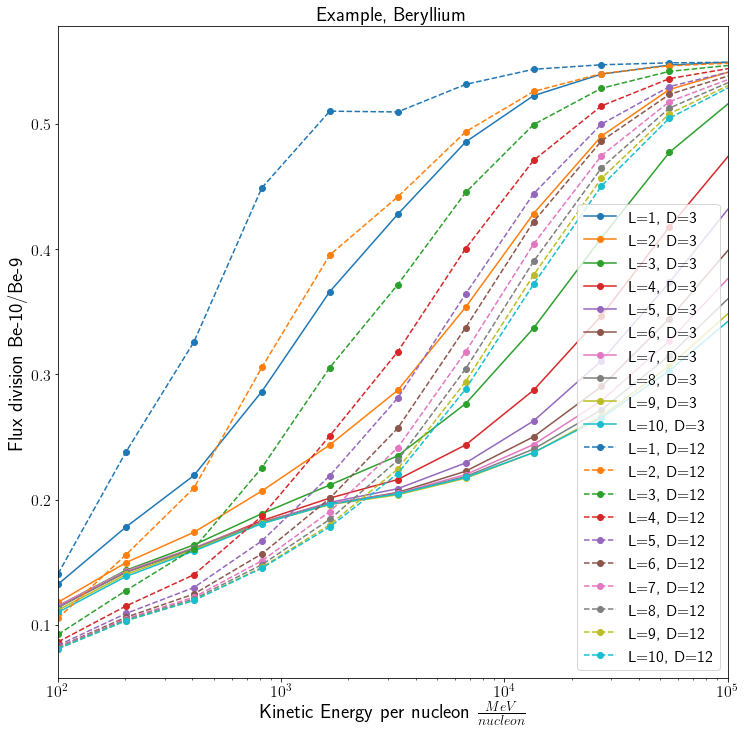

In [24]:
fnt=20
x1=10**2
x2=10**5
plt.figure(figsize=(12,12))
L_val=1
D_val=3
while L_val<11:
    plt.plot(energy,Be_10_Be_9_full[D_val-3][L_val-1],'-o',label="L="+str(L_val)+", D="+str(D_val))
    L_val+=1
L_val=1
D_val=12
while L_val<11:
    plt.plot(energy,Be_10_Be_9_full[D_val-3][L_val-1],'--o',label="L="+str(L_val)+", D="+str(D_val))
    L_val+=1
#plt.plot(energy,be_10_be_9_3,'-o',label="L=3")
#plt.plot(energy,be_10_be_9_4,'-o',label="L=4")
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio_multiple_halo_sizes.png")
plt.show()

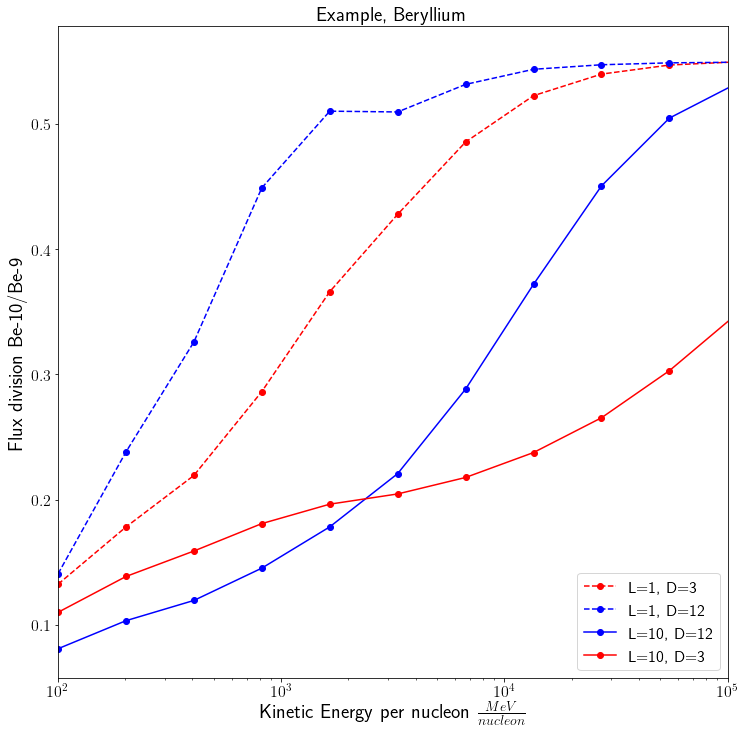

In [25]:
fnt=20
x1=10**2
x2=10**5
plt.figure(figsize=(12,12))
L_val=1
D_val=3
plt.plot(energy,Be_10_Be_9_full[D_val-3][L_val-1],'--o',color='red',label="L="+str(L_val)+", D="+str(D_val))
L_val=1
D_val=12
plt.plot(energy,Be_10_Be_9_full[D_val-3][L_val-1],'--o',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=12
plt.plot(energy,Be_10_Be_9_full[D_val-3][L_val-1],'-o',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=3
plt.plot(energy,Be_10_Be_9_full[D_val-3][L_val-1],'-o',color='red',label="L="+str(L_val)+", D="+str(D_val))
#plt.plot(energy,be_10_be_9_3,'-o',label="L=3")
#plt.plot(energy,be_10_be_9_4,'-o',label="L=4")
#plt.plot(energy,be_10_be_9_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division Be-10/Be-9",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Beryllium", fontsize=fnt)
plt.savefig("be_ratio_L_D_extremes.png")
plt.show()

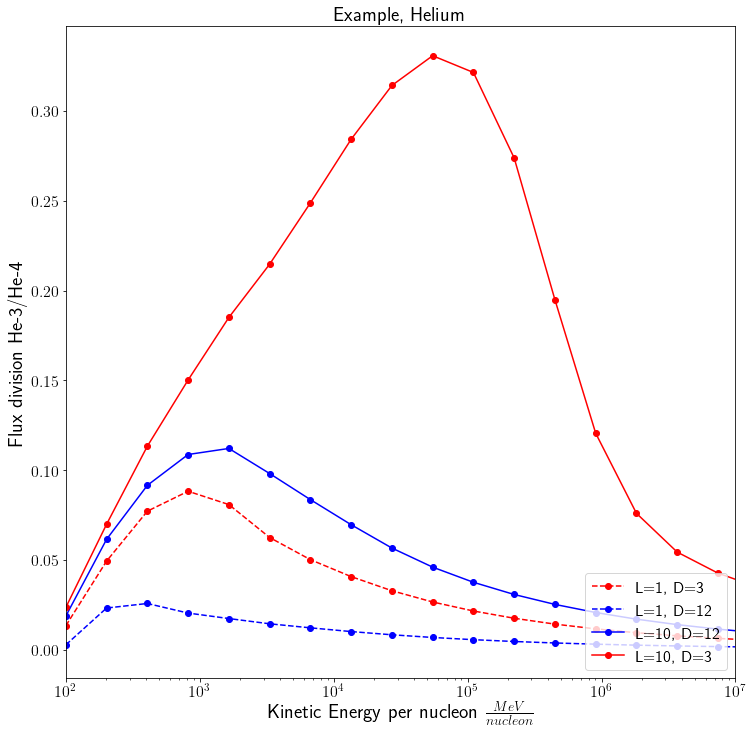

In [25]:
fnt=20
x1=10**2
x2=10**7
plt.figure(figsize=(12,12))
L_val=1
D_val=3
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--o',color='red',label="L="+str(L_val)+", D="+str(D_val))
L_val=1
D_val=12
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--o',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=12
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'-o',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=3
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'-o',color='red',label="L="+str(L_val)+", D="+str(D_val))
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_multiple_halo_sizes.png")
plt.show()

In [26]:
#make more isotope ratios here, store as arrays?
Li_7_Li_6_2=np.divide(image_data2[13,:,20,y_loc,x_loc],image_data2[12,:,20,y_loc,x_loc])
Li_7_Li_6_3=np.divide(image_data3[13,:,20,y_loc,x_loc],image_data3[12,:,20,y_loc,x_loc])
Li_7_Li_6_4=np.divide(image_data4[13,:,20,y_loc,x_loc],image_data4[12,:,20,y_loc,x_loc])
Ne_22_Ne_20_2=np.divide(image_data2[29,:,20,y_loc,x_loc],image_data2[27,:,20,y_loc,x_loc])
Ne_22_Ne_20_3=np.divide(image_data3[29,:,20,y_loc,x_loc],image_data3[27,:,20,y_loc,x_loc])
Ne_22_Ne_20_4=np.divide(image_data4[29,:,20,y_loc,x_loc],image_data4[27,:,20,y_loc,x_loc])

fnt=20
y1=0.6
y2=1.1
x1=10**2
x2=10**5
fig,ax=plt.subplots(figsize=(12, 18), dpi=400, nrows=3,sharex=True)
fig.subplots_adjust(hspace=0)
ax[0].plot(energy,Li_7_Li_6_2,'-o',label="L=2")
ax[0].plot(energy,Li_7_Li_6_3,'-o',label="L=3")
ax[0].plot(energy,Li_7_Li_6_4,'-o',label="L=4")
ax[0].legend(loc='lower right',fontsize=fnt)
ax[0].set_xscale("log")
ax[0].set_ylabel("Flux division Li-7/Li-6",fontsize=fnt)
ax[0].set_ylim([y1,y2])
ax[0].tick_params(labelsize=fnt)
# beryllium
ax[1].plot(energy,be_10_be_9_2,'-o')
ax[1].plot(energy,be_10_be_9_3,'-o')
ax[1].plot(energy,be_10_be_9_4,'-o')
ax[1].set_xscale("log")
ax[1].set_ylabel("Flux division Be-10/Be-9",fontsize=fnt)
ax[1].set_ylim([0,0.6])
ax[1].tick_params(labelsize=fnt)
# Neon
ax[2].plot(energy,Ne_22_Ne_20_2,'-o')
ax[2].plot(energy,Ne_22_Ne_20_3,'-o')
ax[2].plot(energy,Ne_22_Ne_20_4,'-o')
ax[2].set_xscale("log")
ax[2].set_ylabel("Flux division Ne-22/Ne-20",fontsize=fnt)
ax[2].set_xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
ax[2].tick_params(labelsize=fnt)
ax[2].set_ylim([0.1,0.75])
plt.xlim([x1,x2])
plt.savefig("isotopes_ratio_multiple.png")
plt.show()

NameError: name 'image_data3' is not defined

In [27]:
#nitrogen?

In [28]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-14,14,0.903224903225806)
y_kpc=np.linspace(-14,14,29, endpoint=True)
z_kpc2=np.linspace(-2,2,41, endpoint=True)
z_kpc3=np.linspace(-3,3,61, endpoint=True)
z_kpc4=np.linspace(-4,4,81, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data2[16,2,20,:,:],image_data2[15,2,20,:,:])
#norms = norms[np.logical_not(np.isnan(norms))]

print(norms.shape)
print(norms[:,10])

[-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.
   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.]
(29, 32)
[       nan 0.08795587 0.09477444 0.1009125  0.12044006 0.11866192
 0.10620475 0.1178438  0.11128765 0.12626424 0.13491084 0.13340981
 0.13773635 0.13962482 0.14003983 0.13962482 0.13773635 0.13340981
 0.13491084 0.12626424 0.11128765 0.1178438  0.10620475 0.11866192
 0.12044006 0.1009125  0.09477444 0.08795587        nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


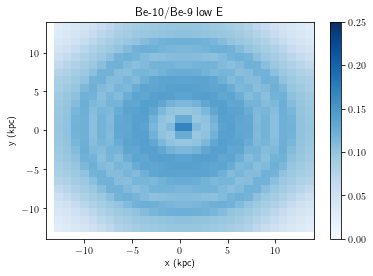

In [29]:
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, vmin=0,vmax=0.25,cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.xlabel("x (kpc)")
plt.ylabel("y (kpc)")
plt.title("Be-10/Be-9 low E")
plt.savefig("proof_of_concept.png")
plt.show()

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]
(41, 32)
[       nan 0.00089595 0.00097536 0.00111489 0.00132791 0.00163504
 0.00206644 0.002665   0.00349095 0.00462838 0.00619435 0.0083516
 0.01132614 0.01543165 0.02110279 0.02893995 0.03976651 0.05469488
 0.07518101 0.1028947  0.13491084 0.10289384 0.07517976 0.05469343
 0.03976507 0.02893865 0.02110169 0.01543075 0.01132544 0.00835106
 0.00619394 0.00462806 0.00349071 0.00266482 0.0020663  0.00163493
 0.00132782 0.00111482 0.00097529 0.00089589        nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


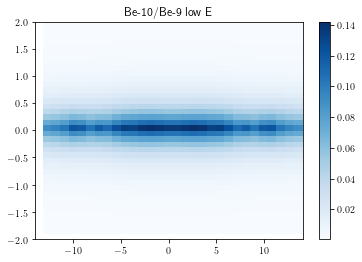

In [30]:
#now for x,z at same energy.
X,Z=np.meshgrid(x_kpc,z_kpc2)
print(z_kpc2)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data2[16,2,:,10,:],image_data2[15,2,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 low E")
plt.savefig("proof_of_concept_xz.png")
plt.show()

[-14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.
   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.]
(29, 32)
[       nan 0.549296   0.54942954 0.54960114 0.54983985 0.5499499
 0.5499857  0.5501424  0.55020255 0.5503644  0.5504684  0.5504895
 0.5505212  0.55052763 0.55052674 0.55052763 0.5505212  0.5504895
 0.5504684  0.5503644  0.55020255 0.5501424  0.5499857  0.5499499
 0.54983985 0.54960114 0.54942954 0.549296          nan]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


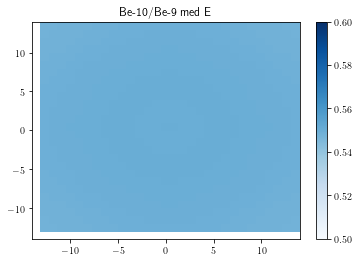

In [31]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data2[16,12,20,:,:],image_data2[15,12,20,:,:])
print(norms.shape)
print(norms[:,10])
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms,vmin=0.5,vmax=0.6, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 med E")
plt.savefig("proof_of_concept_med.png")
plt.show()

In [32]:
#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,12,:,10,:],image_data5[15,12,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 med E")
plt.savefig("proof_of_concept_med_xz.png")
plt.show()

[-2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7
 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7
  0.8  0.9  1.   1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9  2. ]


NameError: name 'image_data5' is not defined

In [34]:
# can i get a map of the normalized flux per particle across the plane of the galaxy?
#first make grid of the galaxy
x_kpc=np.arange(-10,10,0.869564347826087)
y_kpc=np.linspace(-10,10,21, endpoint=True)
X,Y=np.meshgrid(x_kpc,y_kpc)
print(y_kpc)
# now make the normalized flux for a given energy
norms=np.divide(image_data5[16,22,20,:,:],image_data5[15,22,20,:,:])
print(norms.shape)
print(norms[:,10])
# plotting the 3d full output on xy (plane of galaxy) at z of 0.
#need to make an array thats (x,y,mag) where mag is normalized. 
#plt.imshow((X,Y), cmap='gray')
plt.pcolormesh(X, Y, norms, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 high E")
plt.savefig("proof_of_concept_high.png")
plt.show()#now for x,z at same energy.
x_kpc=np.arange(-10,10,0.869564347826087)
z_kpc=np.linspace(-2,2,41, endpoint=True)
X,Z=np.meshgrid(x_kpc,z_kpc)
print(z_kpc)
# now make the normalized flux for a given energy
norms_xz=np.divide(image_data5[16,22,:,10,:],image_data5[15,22,:,10,:])
print(norms_xz.shape)
print(norms_xz[:,10])
plt.pcolormesh(X, Z, norms_xz, cmap=plt.cm.get_cmap('Blues'))
plt.colorbar()
plt.title("Be-10/Be-9 high E")
plt.savefig("proof_of_concept_high_xz.png")
plt.show()

[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]


NameError: name 'image_data5' is not defined

In [35]:
#read in the ams data on helium
ams=pd.read_csv('he_3_4_ams_data.csv')
ams.head()
#join low and high together as one array to be used as x error bars
ams_energy=np.array((ams.EK_low.values,ams.Ek_high.values.T))
ams_energy=ams_energy*1000
ams_energy_mp=(ams_energy[0,:]+ams_energy[1,:])/2.0
# now make the error bar sizes (symmetric about these midpoints)
ams_energy_binsize=(ams_energy[1,:]-ams_energy[0,:])/2.0
#make the ratio an array
ams_ratio=np.array(ams._3He_over_4He.values * ams._factor_ratio.values)

In [36]:
ams_ratio_sys_erros=np.array(ams._sys_ratio.values * ams._factor_ratio)
ams_ratio_stat_erros=np.array(ams._stat_ratio.values * ams._factor_ratio)
ams_ratio_errors=np.sqrt(np.square(ams_ratio_stat_erros)+np.square(ams_ratio_sys_erros))
ams_ratio_errors

array([0.00982497, 0.00702567, 0.00712531, 0.00722496, 0.00742428,
       0.00468402, 0.00475395, 0.00494773, 0.00494773, 0.00523927,
       0.00521728, 0.00531507, 0.00531507, 0.00531507, 0.00509902,
       0.00806226, 0.00452769, 0.00452769, 0.00461736, 0.00451774,
       0.00441814, 0.00441814, 0.00462709, 0.0054231 , 0.00841487,
       0.00921358])

In [37]:
ams_energy[1,2]
ams_energy_mp[25]

9455.0

In [38]:
ams.tail()

,EK_low,Ek_high,_3He,_stat_3he,_sys_3he,_factor_3he,_4He,_stat_4he,_sys_4he,factor_4he,_3He_over_4He,_stat_ratio,_sys_ratio,_factor_ratio
21,5.62,6.31,6.298,0.017,0.158,0.1,3.748,0.001,0.079,1,1.680,0.004,0.044,0.1
22,6.31,7.08,4.827,0.013,0.120,0.1,2.932,0.001,0.065,1,1.646,0.005,0.046,0.1
23,7.08,7.94,3.620,0.011,0.090,0.1,2.269,0.001,0.060,1,1.595,0.005,0.054,0.1
24,7.94,8.91,2.669,0.009,0.087,0.1,1.731,0.001,0.059,1,1.542,0.005,0.084,0.1
25,8.91,10.00,1.885,0.007,0.071,0.1,1.284,0.001,0.046,1,1.468,0.005,0.092,0.1


In [39]:
ams_energy

array([[  500.,   560.,   630.,   710.,   790.,   890.,  1000.,  1120.,
         1260.,  1410.,  1580.,  1780.,  2000.,  2240.,  2510.,  2820.,
         3160.,  3550.,  3980.,  4470.,  5010.,  5620.,  6310.,  7080.,
         7940.,  8910.],
       [  560.,   630.,   710.,   790.,   890.,  1000.,  1120.,  1260.,
         1410.,  1580.,  1780.,  2000.,  2240.,  2510.,  2820.,  3160.,
         3550.,  3980.,  4470.,  5010.,  5620.,  6310.,  7080.,  7940.,
         8910., 10000.]])

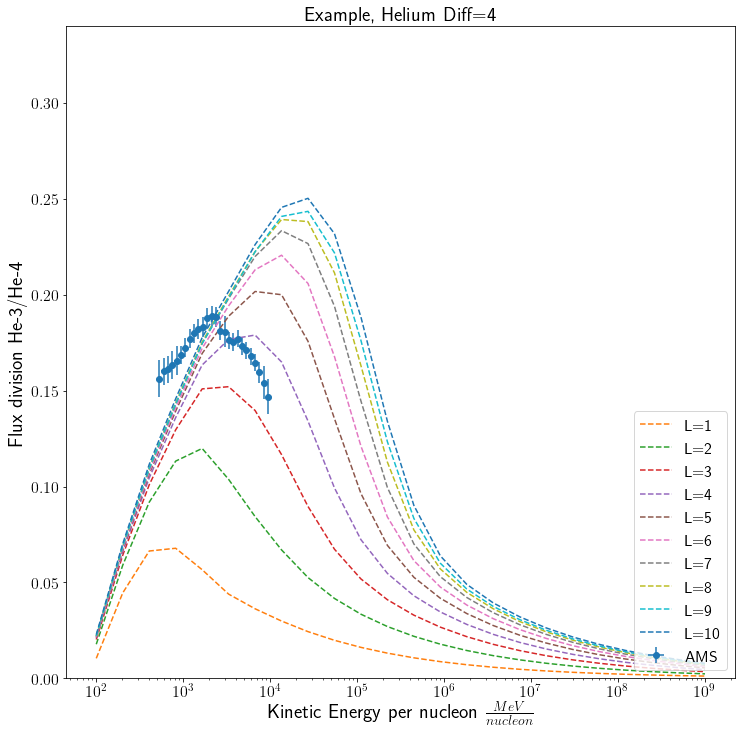

In [40]:
fnt=20
x1=10**2
x2=10**7
y1=0
y2=0.34
plt.figure(figsize=(12,12))
plt.errorbar(ams_energy_mp,ams_ratio,xerr=ams_energy_binsize,yerr=ams_ratio_errors,fmt='o',label="AMS")
L_val=1
D_val=4
while L_val<11:
    plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--',label="L="+str(L_val))
    L_val+=1
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.ylim([y1,y2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium Diff="+str(D_val), fontsize=fnt)
plt.savefig("He_ratio_ams_data_halo_sizes_diff_"+str(D_val)+".png")
plt.show()

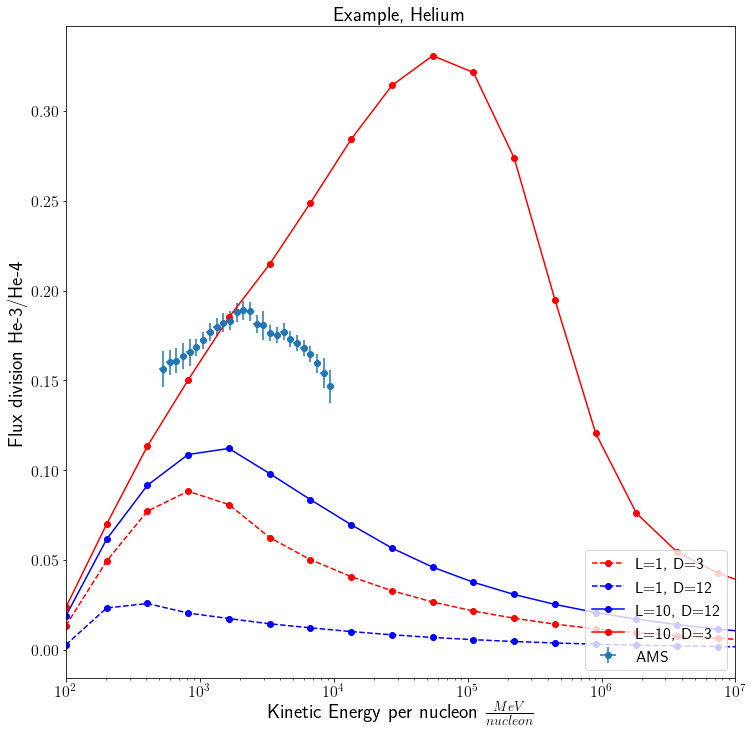

In [41]:
fnt=20
x1=10**2
x2=10**7
plt.figure(figsize=(12,12))
L_val=1
D_val=3
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--o',color='red',label="L="+str(L_val)+", D="+str(D_val))
L_val=1
D_val=12
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--o',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=12
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'-o',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=3
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'-o',color='red',label="L="+str(L_val)+", D="+str(D_val))
plt.errorbar(ams_energy_mp,ams_ratio,xerr=ams_energy_binsize,yerr=ams_ratio_errors,fmt='o',label="AMS")
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_multiple_halo_sizes_with_AMS_data.png")
plt.show()

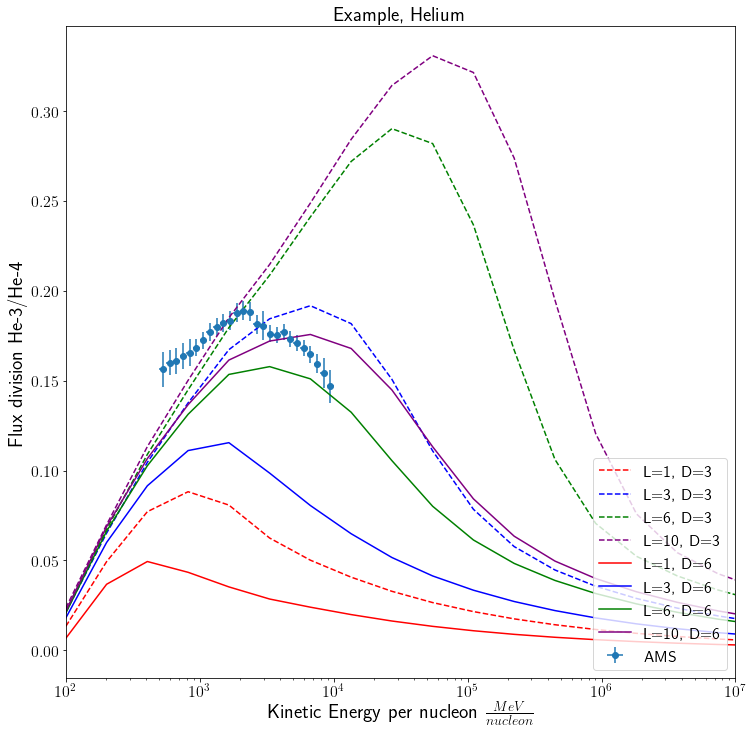

In [42]:
fnt=20
x1=10**2
x2=10**7
plt.figure(figsize=(12,12))
L_val=1
D_val=3
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--',color='red',label="L="+str(L_val)+", D="+str(D_val))
L_val=3
D_val=3
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=6
D_val=3
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--',color='green',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=3
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'--',color='purple',label="L="+str(L_val)+", D="+str(D_val))
########################################################
L_val=1
D_val=6
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'-',color='red',label="L="+str(L_val)+", D="+str(D_val))
L_val=3
D_val=6
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'-',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=6
D_val=6
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'-',color='green',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=6
plt.plot(energy,He_3_He_4_full[D_val-3][L_val-1],'-',color='purple',label="L="+str(L_val)+", D="+str(D_val))
plt.errorbar(ams_energy_mp,ams_ratio,xerr=ams_energy_binsize,yerr=ams_ratio_errors,fmt='o',label="AMS")
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_multiple_halo_sizes_close_to_AMS_data.png")
plt.show()

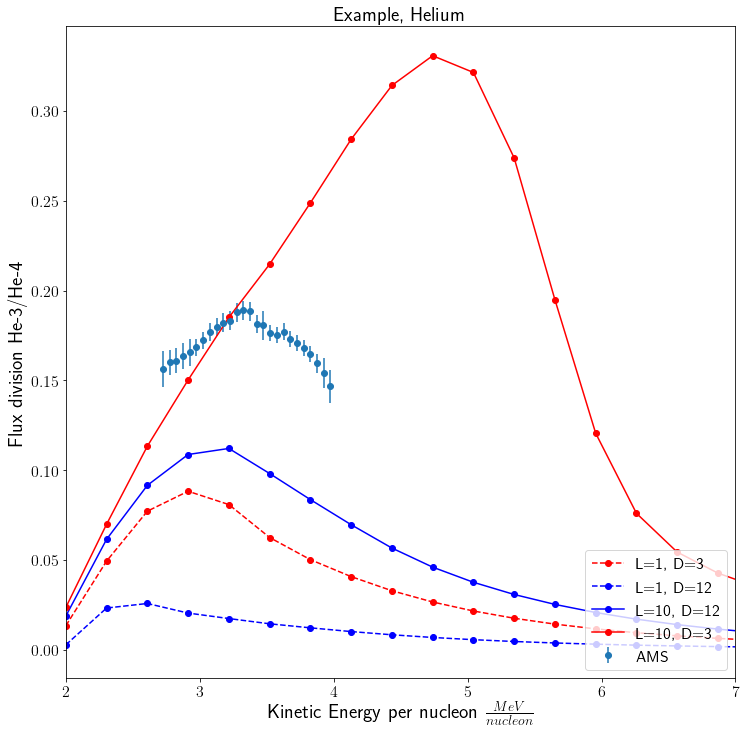

In [43]:
energy_1=np.arange(0,7,0.304347391792257)+2
ams_energy_mp_1=np.log10(ams_energy_mp)
fnt=20
x1=2
x2=7
plt.figure(figsize=(12,12))
L_val=1
D_val=3
plt.plot(energy_1,He_3_He_4_full[D_val-3][L_val-1],'--o',color='red',label="L="+str(L_val)+", D="+str(D_val))
L_val=1
D_val=12
plt.plot(energy_1,He_3_He_4_full[D_val-3][L_val-1],'--o',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=12
plt.plot(energy_1,He_3_He_4_full[D_val-3][L_val-1],'-o',color='blue',label="L="+str(L_val)+", D="+str(D_val))
L_val=10
D_val=3
plt.plot(energy_1,He_3_He_4_full[D_val-3][L_val-1],'-o',color='red',label="L="+str(L_val)+", D="+str(D_val))
plt.errorbar(ams_energy_mp_1,ams_ratio,yerr=ams_ratio_errors,fmt='o',label="AMS")
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
#plt.xscale("log")
plt.xlabel("Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_no_log_with_AMS_data.png")
plt.show()

In [44]:
from scipy.interpolate import splev, splrep

NameError: name 'smallest_difference_index' is not defined

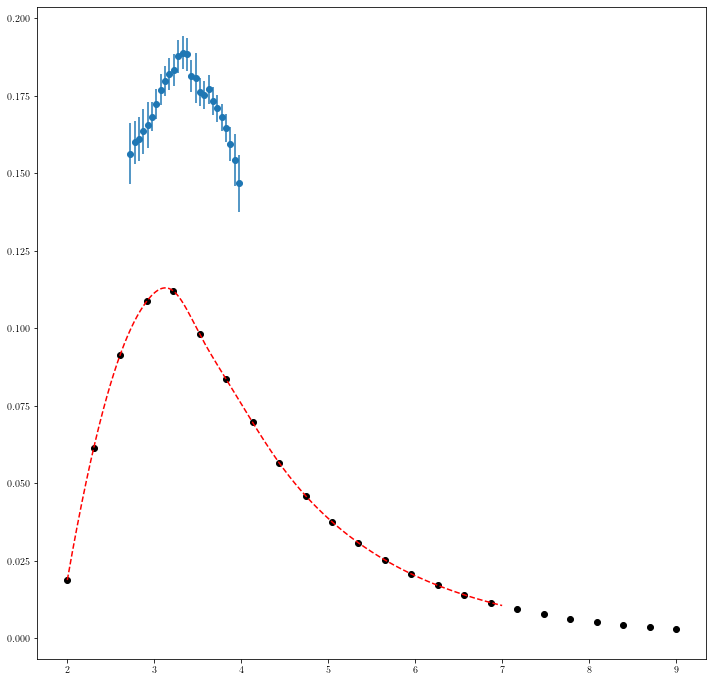

In [46]:
# now do an interpolation on one of these models?
energy_1=np.arange(0,7,0.304347391792257)+2
ams_energy_mp_1=np.log10(ams_energy_mp)
L_val=10
D_val=12
spl = splrep(energy_1,He_3_He_4_full[D_val-3][L_val-1])
energy_cont = np.linspace(2, 7, 2000)
He_3_He_4_spline = splev(energy_cont, spl)

fnt=20
x1=2
x2=7
plt.figure(figsize=(12,12))
plt.plot(energy_1,He_3_He_4_full[D_val-3][L_val-1],'o',color='black',label="L="+str(L_val)+", D="+str(D_val))
plt.plot(energy_cont,He_3_He_4_spline,'--',color='red',label="spline")
plt.errorbar(ams_energy_mp_1,ams_ratio,yerr=ams_ratio_errors,fmt='o',label="AMS")
plt.plot(energy_cont[smallest_difference_index],He_3_He_4_spline[smallest_difference_index],'*',color="green")
plt.axvline(energy_cont[smallest_difference_index])
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
#plt.xscale("log")
plt.xlabel("Log Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division He-3/He-4",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_no_log_with_AMS_data.png")
plt.show()

In [47]:
# to calculate residuals 
#find the elements of the spline energy array closest to the ams energy value:
i=0
closest_element=[]
closest_index=[]
residual=[]
while i<len(ams_energy_mp_1):
    array=energy_cont
    value=ams_energy_mp_1[i]
    absolute_val_array = np.abs(array - value)
    smallest_difference_index = absolute_val_array.argmin()
    closest_element.append(array[smallest_difference_index])
    closest_index.append(smallest_difference_index)
    residual.append(ams_ratio[i]-He_3_He_4_spline[smallest_difference_index])
    i+=1
print(ams_energy_mp_1)
print(closest_element)
print(closest_index)
print(residual)

[2.72427587 2.77451697 2.8260748  2.87506126 2.92427929 2.97543181
 3.02530587 3.07554696 3.12548127 3.17464119 3.22530928 3.2764618
 3.32633586 3.37566361 3.42569721 3.47567119 3.52569252 3.57576498
 3.62582671 3.67577834 3.72550327 3.77561045 3.82575058 3.87563994
 3.92556991 3.97566153]
[2.72536268134067, 2.7753876938469233, 2.8254127063531764, 2.8754377188594296, 2.9254627313656827, 2.975487743871936, 3.0255127563781894, 3.075537768884442, 3.125562781390695, 3.1755877938969483, 3.2256128064032015, 3.2756378189094546, 3.3256628314157077, 3.375687843921961, 3.425712856428214, 3.475737868934467, 3.5257628814407203, 3.5757878939469734, 3.6258129064532265, 3.6758379189594796, 3.7258629314657328, 3.775887943971986, 3.825912956478239, 3.875937968984492, 3.9259629814907453, 3.9759879939969984]
[290, 310, 330, 350, 370, 390, 410, 430, 450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670, 690, 710, 730, 750, 770, 790]
[0.05675919048250094, 0.05757956830181128, 0.05602898453273594, 0.05

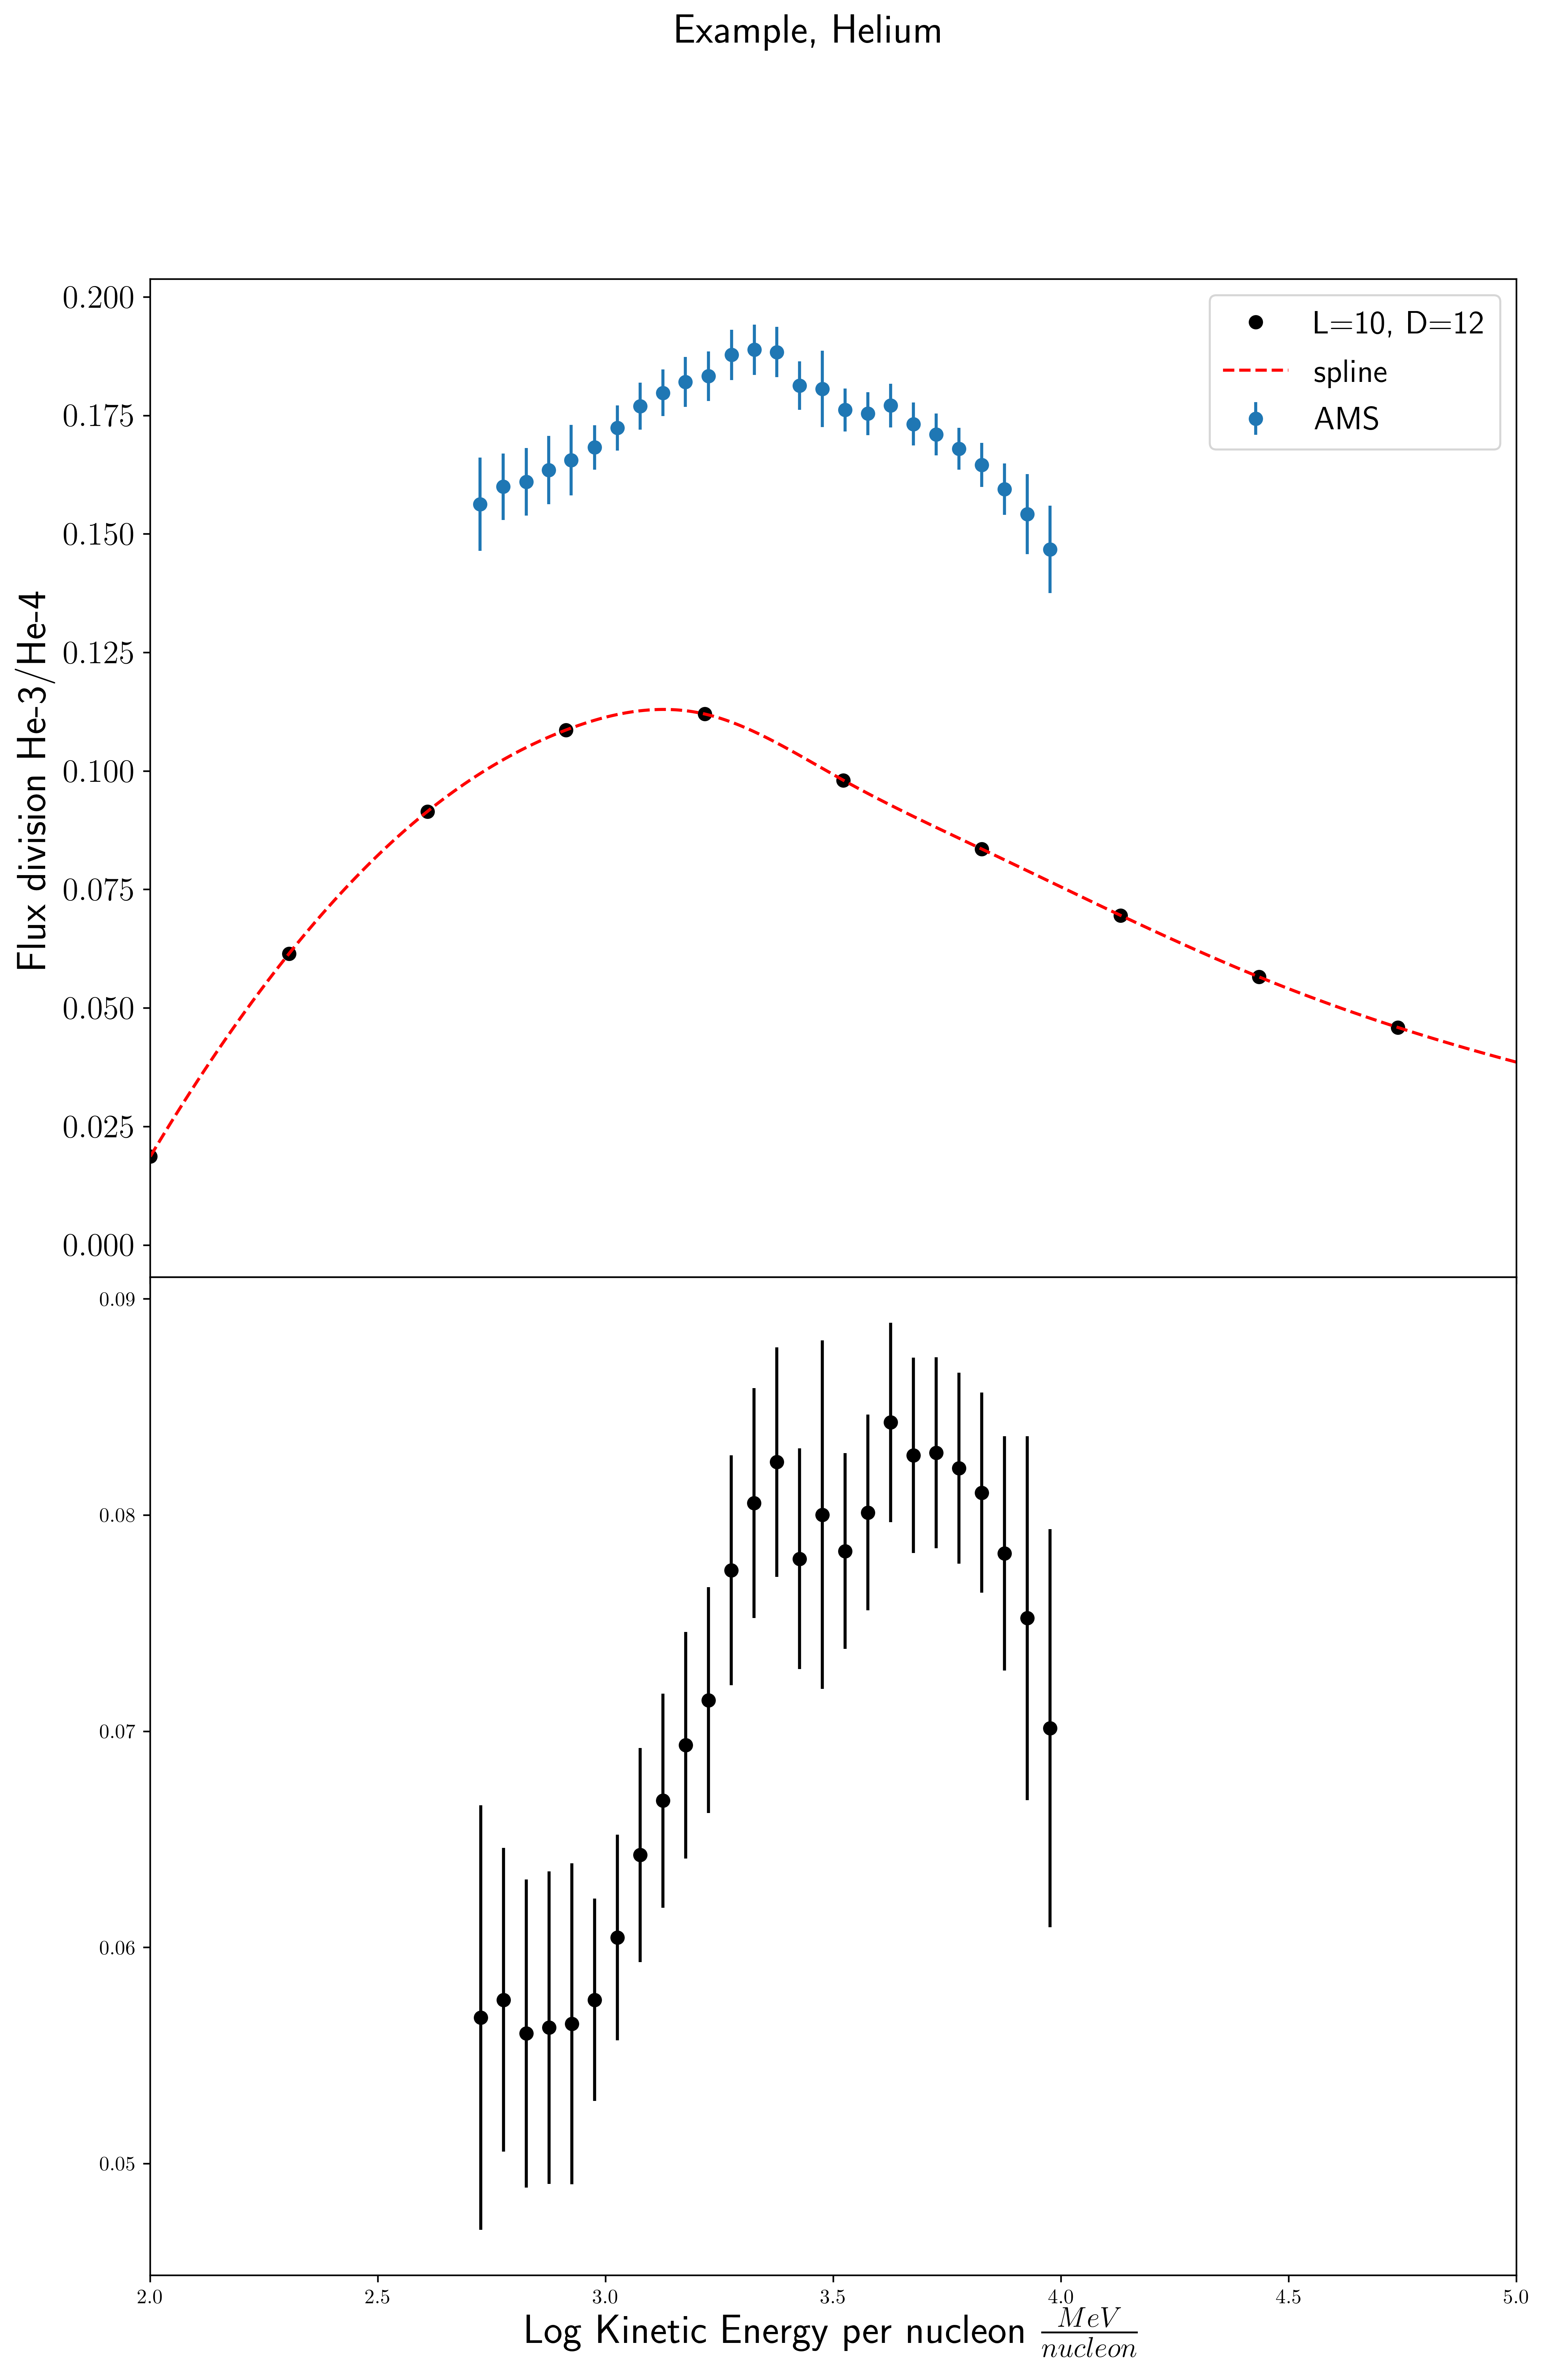

In [48]:
fnt=20
x1=2
x2=5
fig,ax=plt.subplots(figsize=(12, 18), dpi=400, nrows=2,sharex=True)
fig.subplots_adjust(hspace=0)

ax[0].plot(energy_1,He_3_He_4_full[D_val-3][L_val-1],'o',color='black',label="L="+str(L_val)+", D="+str(D_val))
ax[0].plot(energy_cont,He_3_He_4_spline,'--',color='red',label="spline")
ax[0].errorbar(ams_energy_mp_1,ams_ratio,yerr=ams_ratio_errors,fmt='o',label="AMS")
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
#plt.xscale("log")
ax[0].tick_params(labelsize=fnt-4)
#plt.yscale("log")
ax[0].set_ylabel("Flux division He-3/He-4",fontsize=fnt)
#plt.yticks(fontsize=fnt-4)
ax[0].set_xlim([x1,x2])
ax[0].legend(loc='upper right', fontsize=fnt-4)
ax[1].set_xlabel("Log Kinetic Energy per nucleon "r'$\frac{MeV}{nucleon}$',fontsize=fnt)
ax[1].errorbar(closest_element,residual,yerr=ams_ratio_errors,fmt='o',color='black')
plt.suptitle("Example, Helium", fontsize=fnt)
plt.savefig("He_ratio_no_log_with_AMS_data_residual.png")
plt.show()

In [49]:
print(np.square(residual))
print(np.sum(np.square(residual)))

[0.00322161 0.00331541 0.00313925 0.00316949 0.00318981 0.00331567
 0.00365576 0.00413202 0.00446153 0.00481134 0.00510469 0.00599904
 0.00649123 0.00679926 0.00608217 0.00640426 0.00613701 0.00642017
 0.00710556 0.00685128 0.00687041 0.00675173 0.00656801 0.00612043
 0.00566056 0.00492046]
0.13669816652159703


In [ ]:
# I could then caculate the residual for all the models with the data after splining each and find make a contour map of L vs D with the sum of res squares as the z axis

In [72]:
#opening boron_carbon
#read in the ams data on helium
ams=pd.read_csv('B_C_ams_data.csv')
ams.head()
#join low and high together as one array to be used as x error bars
ams_energy=np.array((ams.Rigidity.values,ams.GV.values.T))
#ams_energy=ams_energy*1000
ams_energy_mp=(ams_energy[0,:]+ams_energy[1,:])/2.0
# now make the error bar sizes (symmetric about these midpoints)
ams_energy_binsize=(ams_energy[1,:]-ams_energy[0,:])/2.0
#make the ratio an array
ams_ratio=np.array(ams['B/C'].values)

In [73]:
ams.head()


,Rigidity,GV,B/C,_stat_ratio,_acc_ratio,_unf_ratio,_scale_ratio,_sys_ratio
0,1.92,2.15,0.2867,0.0013,0.0150,0.0051,0.0002,0.0159
1,2.15,2.40,0.2915,0.0011,0.0137,0.0031,0.0002,0.0140
2,2.40,2.67,0.2995,0.0010,0.0127,0.0025,0.0002,0.0129
3,2.67,2.97,0.3061,0.0010,0.0117,0.0022,0.0002,0.0119
4,2.97,3.29,0.3142,0.0010,0.0110,0.0019,0.0001,0.0111


In [74]:
ams_ratio_sys_erros=np.array(ams._sys_ratio.values)
ams_ratio_stat_erros=np.array(ams._stat_ratio.values)
ams_ratio_errors=np.sqrt(np.square(ams_ratio_stat_erros)+np.square(ams_ratio_sys_erros))
ams_ratio_errors

array([0.01595306, 0.01404315, 0.0129387 , 0.01194194, 0.01114495,
       0.01043887, 0.00974166, 0.0091444 , 0.00854751, 0.0080399 ,
       0.00754255, 0.00724431, 0.00694622, 0.00664831, 0.00644981,
       0.0062514 , 0.0060531 , 0.00595399, 0.00577062, 0.00567186,
       0.00547449, 0.00539351, 0.00529528, 0.00519711, 0.00511957,
       0.00502195, 0.00492443, 0.00482701, 0.00472969, 0.00463249,
       0.00463249, 0.0045607 , 0.0045607 , 0.00439659, 0.00430116,
       0.00433244, 0.00436578, 0.004272  , 0.00430813, 0.00425441,
       0.00429535, 0.00420476, 0.00415933, 0.00411825, 0.00425441,
       0.004219  , 0.004272  , 0.00410488, 0.00436005, 0.00428019,
       0.0042638 , 0.00440454, 0.00460977, 0.00460109, 0.00466905,
       0.00459674, 0.00495177, 0.00488365, 0.00495177, 0.0049679 ,
       0.00510882, 0.00574891, 0.00546717, 0.00539073, 0.00636553,
       0.00793095, 0.01030776])

In [75]:
# change the errors on the ams ratio if multiplying in the rigidty times the ratio:
def error_prop(rigidity_power,rigidity,rigidity_errors,ratio,ratio_errors):
    return ratio*rigidity**0.3 *np.sqrt(np.square(np.true_divide(ratio_errors,ratio))+(np.square(np.true_divide(rigidity_errors,rigidity))*(rigidity_power)**2))

In [78]:
new_ams_ratio_errors=error_prop(0.3,ams_energy_mp_1,ams_energy_binsize,ams_ratio,ams_ratio_errors)

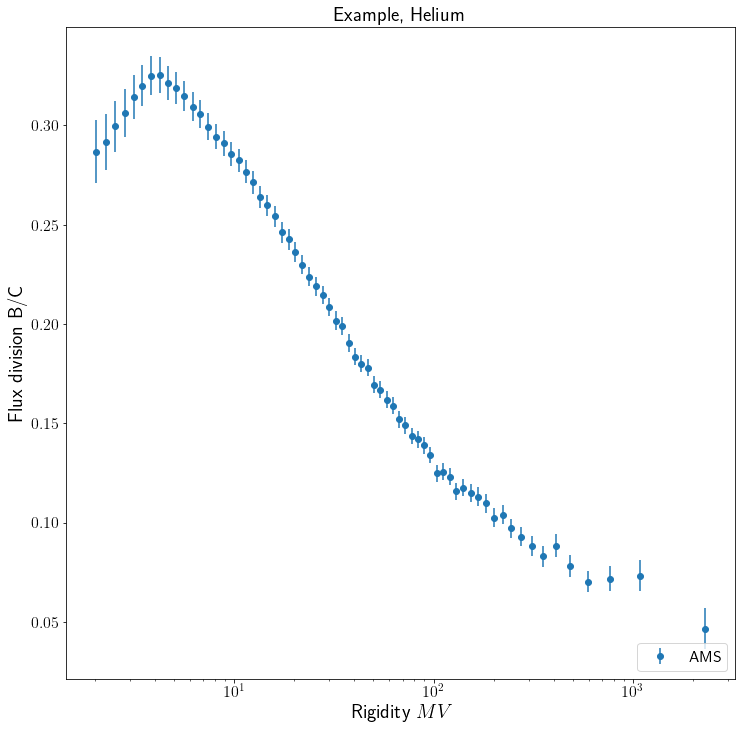

In [81]:
#ams_ratio_mod=ams_ratio*
fnt=20
x1=10**2
x2=10**7
plt.figure(figsize=(12,12))
#plt.plot(energy_1,He_3_He_4_full[D_val-3][L_val-1],'o',color='black',label="L="+str(L_val)+", D="+str(D_val))
#plt.plot(energy_cont,He_3_He_4_spline,'--',color='red',label="spline")
plt.errorbar(ams_energy_mp,ams_ratio,yerr=ams_ratio_errors,fmt='o',label="AMS")
#plt.plot(energy_cont[smallest_difference_index],He_3_He_4_spline[smallest_difference_index],'*',color="green")
#plt.axvline(energy_cont[smallest_difference_index])
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity "r'$MV$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division B/C",fontsize=fnt)
plt.yticks(fontsize=fnt-4)
#plt.xlim([x1,x2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, Helium", fontsize=fnt)
plt.savefig("B_C_ratio_log_AMS_data.png")
plt.show()

In [76]:
ams_energy_1=np.array((ams.Rigidity.values,ams.GV.values.T))
ams_energy_mp_1=(ams_energy_1[0,:]+ams_energy_1[1,:])/2.0

ams_ratio_mod=np.array(ams['B/C'].values) *(ams_energy_mp_1**0.3)


In [77]:
ams_ratio_mod

array([0.35481095, 0.37302074, 0.3959043 , 0.41777078, 0.44245538,
       0.46443529, 0.48623139, 0.50122425, 0.50966714, 0.52050688,
       0.52898193, 0.53429589, 0.54265306, 0.54615467, 0.55164168,
       0.56010581, 0.56451157, 0.57238285, 0.5753134 , 0.57857903,
       0.57679459, 0.58165726, 0.58367967, 0.5787959 , 0.58426803,
       0.58305904, 0.58047081, 0.57884084, 0.57999474, 0.58130786,
       0.57840675, 0.57209303, 0.5766206 , 0.56477612, 0.556306  ,
       0.55823785, 0.56427883, 0.5489253 , 0.55242788, 0.54758988,
       0.54953087, 0.53686546, 0.53781906, 0.52926778, 0.53554293,
       0.53493351, 0.52779223, 0.50231536, 0.51731497, 0.51784671,
       0.49832923, 0.51900681, 0.51972595, 0.52561415, 0.52348154,
       0.50350801, 0.52594367, 0.50588554, 0.50097439, 0.49383195,
       0.48243566, 0.53738733, 0.49933372, 0.47726747, 0.52658244,
       0.59749177, 0.47421065])

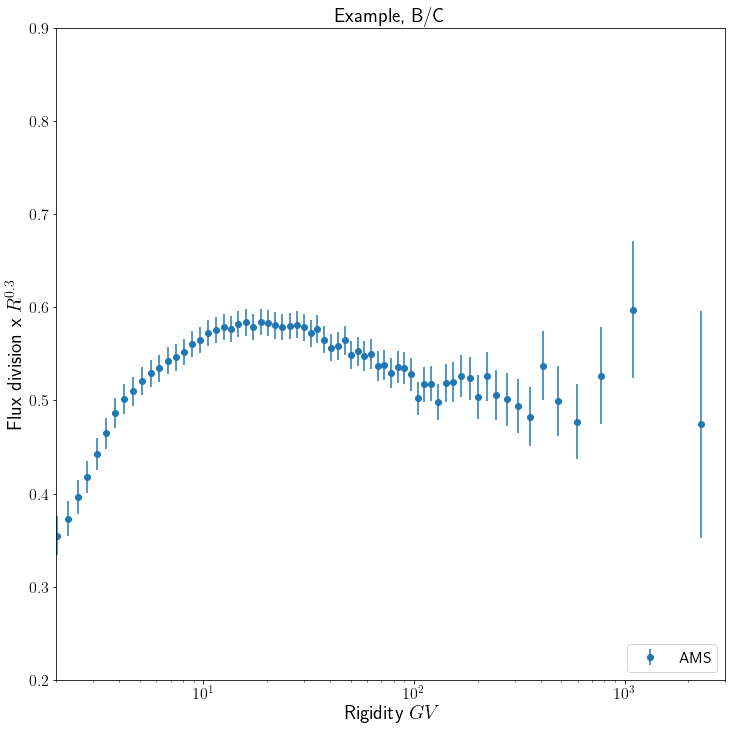

In [86]:
fnt=20
x1=2*10**0
x2=3*10**3
y1=0.2
y2=0.9
plt.figure(figsize=(12,12))
#plt.plot(energy_1,He_3_He_4_full[D_val-3][L_val-1],'o',color='black',label="L="+str(L_val)+", D="+str(D_val))
#plt.plot(energy_cont,He_3_He_4_spline,'--',color='red',label="spline")
plt.errorbar(ams_energy_mp_1,ams_ratio_mod,yerr=new_ams_ratio_errors,fmt='o',label="AMS")
#plt.plot(energy_cont[smallest_difference_index],He_3_He_4_spline[smallest_difference_index],'*',color="green")
#plt.axvline(energy_cont[smallest_difference_index])
#plt.plot(energy,he_3_4_3,'-o',label="L=3")
#plt.plot(energy,he_3_4_4,'-o',label="L=4")
#plt.plot(energy,he_3_4_5,'-o',label="L=5")
plt.xscale("log")
plt.xlabel("Rigidity "r'$GV$',fontsize=fnt)
plt.xticks(fontsize=fnt-4)
#plt.yscale("log")
plt.ylabel("Flux division x "r'$R^{0.3}$',fontsize=fnt)
plt.yticks(fontsize=fnt-4)
plt.xlim([x1,x2])
plt.ylim([y1,y2])
plt.legend(loc='lower right', fontsize=fnt-4)
plt.title("Example, B/C", fontsize=fnt)
plt.savefig("B_C_ratio_log_AMS_data_weird_scale.png")
plt.show()